<a href="https://colab.research.google.com/github/the-redlord/transfer_learning_classification-keras/blob/master/TransferLearning_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification With Transfer Learning Using Keras

# Task 1: Importing Libraries

In [2]:
import tensorflow as tf
import tarfile
import urllib
import os
import numpy as np
import pets

from matplotlib import pyplot as plt
%matplotlib inline

data_dir = 'data/'
if not os.path.isdir(data_dir):
    os.mkdir(data_dir)

print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.2.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is using GPU? False


# Task 2: Cats vs Dogs Dataset

In [3]:
pets.download_and_extract('data','.')

In [5]:
class_to_index = {'cat': 0, 'dog': 1}
index_to_class = {0: 'cat', 1: 'dog'}

train_annot, count_train = pets.cats_vs_dogs_annotations('data/annotations/trainval.txt')
test_annot, count_test = pets.cats_vs_dogs_annotations('data/annotations/test.txt')

print('Training examples: ', count_train)
print('Test examples: ', count_test)

Training examples:  3680
Test examples:  3669


In [7]:
print(train_annot)

{'Abyssinian_100.jpg': 'cat', 'Abyssinian_101.jpg': 'cat', 'Abyssinian_102.jpg': 'cat', 'Abyssinian_103.jpg': 'cat', 'Abyssinian_104.jpg': 'cat', 'Abyssinian_105.jpg': 'cat', 'Abyssinian_106.jpg': 'cat', 'Abyssinian_107.jpg': 'cat', 'Abyssinian_108.jpg': 'cat', 'Abyssinian_109.jpg': 'cat', 'Abyssinian_10.jpg': 'cat', 'Abyssinian_110.jpg': 'cat', 'Abyssinian_111.jpg': 'cat', 'Abyssinian_112.jpg': 'cat', 'Abyssinian_113.jpg': 'cat', 'Abyssinian_114.jpg': 'cat', 'Abyssinian_115.jpg': 'cat', 'Abyssinian_116.jpg': 'cat', 'Abyssinian_117.jpg': 'cat', 'Abyssinian_118.jpg': 'cat', 'Abyssinian_119.jpg': 'cat', 'Abyssinian_11.jpg': 'cat', 'Abyssinian_120.jpg': 'cat', 'Abyssinian_121.jpg': 'cat', 'Abyssinian_122.jpg': 'cat', 'Abyssinian_123.jpg': 'cat', 'Abyssinian_124.jpg': 'cat', 'Abyssinian_125.jpg': 'cat', 'Abyssinian_126.jpg': 'cat', 'Abyssinian_127.jpg': 'cat', 'Abyssinian_128.jpg': 'cat', 'Abyssinian_129.jpg': 'cat', 'Abyssinian_12.jpg': 'cat', 'Abyssinian_130.jpg': 'cat', 'Abyssinian_131.

# Task 3: Get Random Batch

In [11]:
image_dir = './data/images/'

def get_random_batch(annot, batch_size = 4):
  all_keys = list(annot.keys())
  total_examples = len(all_keys)

  indices = np.random.choice(range(total_examples), batch_size)

  x = np.zeros((batch_size, 128,128,3))
  y = np.zeros((batch_size,1))

  images = []

  for i, index in enumerate(indices):
    image_path = os.path.join(image_dir, all_keys[index])
    image = tf.keras.preprocessing.image.load_img(
        image_path, target_size=(128,128)
    )
    arr = tf.keras.preprocessing.image.img_to_array(image)
    arr = tf.keras.applications.mobilenet_v2.preprocess_input(arr)
    arr = np.expand_dims(arr,axis=0)
    x[i] = arr
    y[i] = class_to_index[annot[all_keys[index]]]
    images.append(image)

  return x,y, images

Displaying first 8 examples..


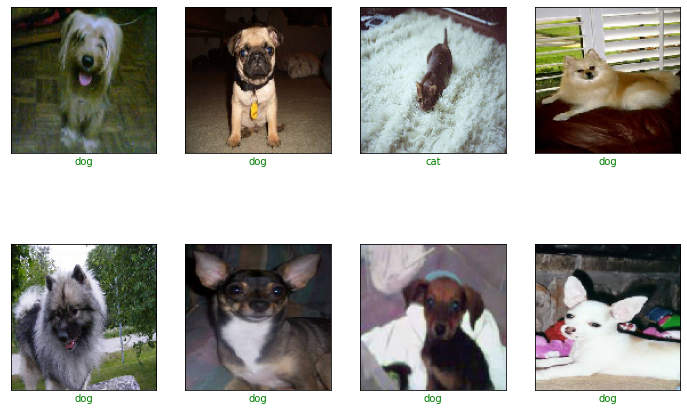

In [13]:
x, y, images = get_random_batch(train_annot,batch_size=8)
pets.display_examples(x,y,y,images,index_to_class).show()

# Task 4: Create Model

# Task 5: Model Training

# Task 6: Predictions